In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

In [2]:
# 数据加载
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [3]:
# 数据探索
# 查看train_data信息
# 查看数据信息：列名、非空个数、类型等
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 查看数据摘要
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 查看离散数据分布
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Morley, Mr. William",male,347082,G6,S
freq,1,577,7,4,644


In [6]:
# 查看前5条数据
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 查看后5条数据
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# 使用平均年龄来填充年龄中的nan值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [9]:
# 使用票价的均值填充票价中的nan值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [10]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# 使用登录最多的港口来填充登录港口的nan值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)

In [12]:
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]
# 特征值
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [13]:
dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
dvec.feature_names_
# 构造ID3决策树
clf = DecisionTreeClassifier(criterion='entropy')
# 决策树训练
clf.fit(train_features, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
test_features=dvec.transform(test_features.to_dict(orient='record'))
# 决策树预测
pred_labels = clf.predict(test_features)

# 得到决策树准确率(基于训练集)
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score准确率为 %.4lf' % acc_decision_tree)

# 使用K折交叉验证 统计决策树准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))


score准确率为 0.9820
cross_val_score准确率为 0.7723


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
def show_feature_importance(feature_list, feature_importance):
    # 设定阈值
    fi_threshold = 20
    # 重要特征的下标
    important_idx = np.where(feature_importance > fi_threshold)[0]
    # 特征名称
    important_features = [feature_list[i] for i in important_idx]
    # 重要特征
    sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
    # 可视化
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.subplot(1, 2, 2)
    plt.title('Feature Importance')
    plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
    plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
    plt.xlabel('Relative Importance')
    plt.draw()
    plt.show()

In [17]:
# 使用LR分类器
clf = LogisticRegression(max_iter=100, verbose=True, random_state=33, tol=1e-4)
clf.fit(train_features, train_labels)
# 获取特征重要性（更容易幸存的特征）
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


array([ -1.69822624,  33.3308976 ,  30.78591539,  15.56228323,
         0.11008213,  -3.88541044, -46.87656077, 100.        ,
       -20.32090378, -14.17702387])

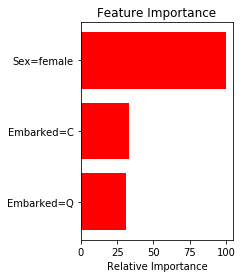

In [18]:
show_feature_importance(dvec.feature_names_, feature_importance)

### tpot

In [22]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(train_features, train_labels)
print(clf.score(train_features, train_labels))
tpot.export('tpot_taitnic_pipeline.py')


Generation 1 - Current best internal CV score: 0.8260812252840374
Generation 2 - Current best internal CV score: 0.8328102441780179
Generation 3 - Current best internal CV score: 0.8350511581193899
Generation 4 - Current best internal CV score: 0.8350511581193899
Generation 5 - Current best internal CV score: 0.8350511581193899

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
0.7991021324354658


#### LR svm RMF KNN

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [39]:
model = {}
model['LR'] = LogisticRegression(solver='lbfgs',max_iter=3000)
model['svm'] = svm.SVC()
#设置随机森林系数
model['RMF'] =RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
model['KNN'] = KNeighborsClassifier()
for i in model:
    model[i].fit(train_features, train_labels)
    score = cross_val_score(model[i],train_features, train_labels,cv=5,scoring='accuracy')
    print("%s:%.3f(%.3f)"%(i,score.mean(),score.std()))

LR:0.787(0.018)
svm:0.675(0.042)
RMF:0.836(0.029)
KNN:0.698(0.027)
